In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

import numpy as np

# Explore Phonemes

In [9]:
df_train_ph = pd.read_csv('../data/train_formants_phonemes.csv')
df_test_ph = pd.read_csv('../data/test_formants_phonemes.csv')
df_brit_ph = pd.read_csv('../data/british_formants_phonemes.csv')

In [10]:
accent_map = {
    'DR1':'New England',
    'DR2':'Northern',
    'DR3': 'North Midland',
    'DR4': 'South Midland',
    'DR5': 'Southern', 
    'DR6': 'New York City',
    'DR7': 'Western',
    'DR8': 'Moved Around'
}

In [11]:
df_train_ph['accent'] = df_train_ph['accent'].map(accent_map)
df_test_ph['accent'] = df_test_ph['accent'].map(accent_map)
df_brit_ph['accent'] = df_brit_ph['accent'].map(accent_map)

In [13]:
scaler = StandardScaler()
gm = GaussianMixture(n_components=2, random_state=0)
df = df_train_ph.append(df_test_ph)

In [15]:
mfcc_cols = [x for x in df.columns if 'mfcc_median' in x]

['mfcc_median_1',
 'mfcc_median_2',
 'mfcc_median_3',
 'mfcc_median_4',
 'mfcc_median_5',
 'mfcc_median_6',
 'mfcc_median_7',
 'mfcc_median_8',
 'mfcc_median_9',
 'mfcc_median_10',
 'mfcc_median_11',
 'mfcc_median_12']

In [54]:
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(df[mfcc_cols])

gm = GaussianMixture(n_components=60, random_state = 0)
gm.fit(mfcc_scaled)

In [46]:
mfcc_pred = gm.predict(mfcc_scaled)
brit_pred = gm.predict(scaler.transform(df_brit_ph[mfcc_cols]))

In [47]:
df['mfcc_pred'] = mfcc_pred
df_brit_ph['mfcc_pred'] = brit_pred

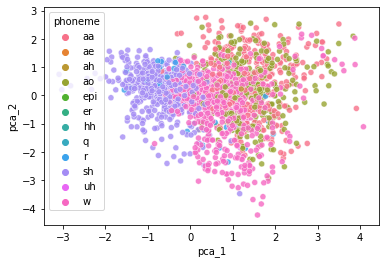

In [48]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(mfcc_scaled)
df_pca = pd.DataFrame(df_pca, columns=['c1', 'c2'])

df[['pca_1', 'pca_2']] = df_pca

sns.scatterplot(data=df[(df['word'].isin(['wash']))], x='pca_1', y='pca_2', hue='phoneme', alpha=0.8)
plt.show()

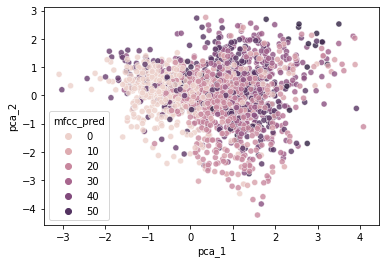

In [49]:
sns.scatterplot(data=df[(df['word'].isin(['wash']))], x='pca_1', y='pca_2', hue='mfcc_pred', alpha=0.8)
plt.show()

In [51]:
pd.crosstab(df[(df['word'].isin(['wash']))]['phoneme'], df[(df['word'].isin(['wash']))]['mfcc_pred'])

mfcc_pred,0,2,3,5,10,13,17,18,19,20,...,49,50,51,53,54,55,56,57,58,59
phoneme,,,,,,,,,,,,,,,,,,,,,
aa,0,0,0,3,2,26,0,0,0,0,...,92,0,0,0,0,0,0,0,17,0
ae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ao,0,0,0,5,7,23,0,0,0,3,...,133,0,1,0,2,0,0,0,3,0
epi,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
er,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
r,0,0,0,1,0,0,2,0,5,0,...,0,11,0,0,0,0,2,0,0,0


In [57]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(df[mfcc_cols])
brit_scaled = scaler.transform(df_brit_ph[mfcc_cols])

knn = KNeighborsClassifier(n_neighbors=10, n_jobs=4)
knn.fit(mfcc_scaled, df['accent'])

KNeighborsClassifier(n_neighbors=10)

In [61]:
# knn.predict(brit_scaled[])
df_brit_ph['accent_predic'] = knn.predict(brit_scaled)

In [114]:
accent_dict = {}
british_accents = {}

for accent in df.accent.unique():
    accent_dict[accent] = 0

        
for phoneme in df_brit_ph.phoneme.unique():
    british_accents[phoneme] = accent_dict.copy()
        

for index, values in df_brit_ph[['phoneme', 'accent_predic']].iterrows():
    
    phoneme = values.phoneme
    accent = values.accent_predic

    if isinstance(accent_pred, np.ndarray):        
        for accent in accent_pred:
            british_accents[phoneme][accent] += 1
    else:
        british_accents[phoneme][accent] += 1

In [117]:
accent_counts = df.accent.value_counts().to_dict()

In [142]:
winning_accent = {}

for phoneme in british_accents.keys():

    max_percentage = 0
    
    for k, v in british_accents[phoneme].items():

        current_percentage =  1.0 * v / accent_counts[k]

        if current_percentage > max_percentage:
            winner = k
            max_percentage  = current_percentage

    winning_accent[phoneme] = winner

North Midland 530 36131 0.014668843929036009
Western 257 36205 0.00709846706256042
New York City 127 16387 0.007750045767986819
South Midland 569 42849 0.013279189712712082
Southern 268 35186 0.007616665719320184
New England 193 17330 0.011136757068667052
Moved Around 142 11732 0.0121036481418343
Northern 378 36530 0.010347659457979743
North Midland 280 36131 0.00774957792477374
Western 201 36205 0.005551719375776826
New York City 60 16387 0.0036614389455055835
South Midland 301 42849 0.007024668020257183
Southern 186 35186 0.005286193372364008
New England 150 17330 0.008655510675129832
Moved Around 113 11732 0.009631776338220252
Northern 281 36530 0.007692307692307693
North Midland 213 36131 0.005895214635631452
Western 132 36205 0.0036459052617041844
New York City 55 16387 0.0033563190333801185
South Midland 250 42849 0.0058344418772900185
Southern 140 35186 0.003978855226510544
New England 118 17330 0.006809001731102135
Moved Around 65 11732 0.005540402318445278
Northern 160 36530 0

Western 494 36205 0.013644524236983842
New York City 241 16387 0.014706779764447429
South Midland 861 42849 0.020093817825386825
Southern 436 35186 0.012391291991132838
New England 277 17330 0.01598384304673976
Moved Around 111 11732 0.009461302420729628
Northern 575 36530 0.015740487270736382
North Midland 504 36131 0.013949240264592731
Western 295 36205 0.008148045850020715
New York City 129 16387 0.007872093732837005
South Midland 460 42849 0.010735373054213635
Southern 257 35186 0.007304041380094356
New England 170 17330 0.009809578765147143
Moved Around 73 11732 0.006222297988407774
Northern 346 36530 0.009471667122912674
North Midland 545 36131 0.015083999889291743
Western 302 36205 0.008341389310868665
New York City 174 16387 0.010618172941966193
South Midland 444 42849 0.010361968774067074
Southern 307 35186 0.008725061103848122
New England 249 17330 0.014368147720715522
Moved Around 73 11732 0.006222297988407774
Northern 510 36530 0.013961127840131399
North Midland 171 36131 0

In [143]:
winning_accent

{'@U': 'North Midland',
 'A:': 'Moved Around',
 'aU': 'New England',
 'b': 'South Midland',
 'd': 'South Midland',
 'e': 'North Midland',
 'g': 'North Midland',
 'I': 'North Midland',
 'j': 'Northern',
 'l': 'North Midland',
 'm': 'North Midland',
 'p': 'North Midland',
 's': 'North Midland',
 't': 'South Midland',
 'V': 'North Midland',
 'v': 'North Midland',
 'z': 'North Midland',
 '{': 'South Midland',
 'k': 'North Midland',
 '3:': 'North Midland',
 '@': 'North Midland',
 '@u': 'North Midland',
 '@v': 'Western',
 nan: 'North Midland',
 'a:': 'Western',
 'aI': 'North Midland',
 'ai': 'South Midland',
 'au': 'North Midland',
 'D': 'South Midland',
 'Di': 'Northern',
 'dZ': 'North Midland',
 'dz': 'Northern',
 'e@': 'Western',
 'eI': 'South Midland',
 'ei': 'Northern',
 'END': 'Northern',
 'f': 'North Midland',
 'h': 'North Midland',
 'i:': 'North Midland',
 'I@': 'North Midland',
 'i@': 'New England',
 'i': 'New England',
 'In': 'Northern',
 'n': 'North Midland',
 'N': 'North Midland'

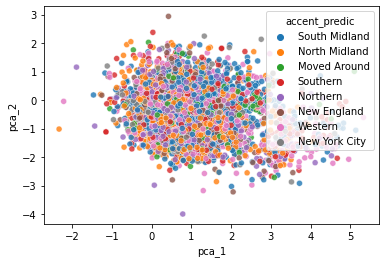

In [148]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(brit_scaled)
df_pca = pd.DataFrame(df_pca, columns=['c1', 'c2'])

df_brit_ph[['pca_1', 'pca_2']] = df_pca

sns.scatterplot(data=df_brit_ph[(df_brit_ph['phoneme'].isin(['e']))], x='pca_1', y='pca_2', hue='accent_predic', alpha=0.8)
plt.show()

In [150]:
from collections import Counter

counts = Counter()

for k, v in winning_accent.items():
    k = str(k)
    if ('a' in k.lower() or 'e' in k.lower() or 'i' in k.lower() or 'o' in k.lower() or 'u' in k.lower() or 'y' in k.lower()):
        print(k)
        counts[v] += 1
    
counts

@U
A:
aU
e
I
@u
nan
a:
aI
ai
au
Di
e@
eI
ei
END
i:
I@
i@
i
In
O:
o:
OI
oi
u:
U@
u@
U
u


Counter({'North Midland': 11,
         'Moved Around': 2,
         'New England': 4,
         'Western': 2,
         'South Midland': 4,
         'Northern': 5,
         'New York City': 1,
         'Southern': 1})

In [151]:
counts = Counter()

for k, v in winning_accent.items():
    k = str(k)
    if ('a' not in k.lower() and 'e' not in k.lower() and 'i' not in k.lower() and 'o' not in k.lower() and 'u' not in k.lower() or 'y' in k.lower()):
        print(k)
        counts[v] += 1
    
counts

b
d
g
j
l
m
p
s
t
V
v
z
{
k
3:
@
@v
D
dZ
dz
f
h
n
N
Q
q
r
S
Sn
T
tS
ts
w
Z


Counter({'South Midland': 7,
         'North Midland': 20,
         'Northern': 3,
         'Western': 1,
         'New England': 2,
         'New York City': 1})